# Single stock analysis example in pyfolio

Here's a simple example where we produce a set of plots, called a tear sheet, for a stock.

## Import pyfolio

In [1]:
%matplotlib inline
import pyfolio as pf

## Fetch the daily returns for a stock

In [2]:
stock_rets = pf.utils.get_symbol_rets('FB')

## Create a full tear sheet for the single stock
This will show charts about returns and shock events. As an example, we set the first 80% of the stock's history to be in-sample, which controls the cone plot. The Bayesian tear sheet is also enabled.

Entire data start date: 2012-05-21 00:00:00
Entire data end date: 2015-07-23 00:00:00


Backtest Months: 38
                   Backtest
sortino_ratio          1.68
omega_ratio            1.18
max_drawdown          -0.48
calmar_ratio           0.80
annual_return          0.39
stability              0.87
sharpe_ratio           0.87
annual_volatility      0.44
alpha                  0.21
beta                   0.98


HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 604, in H5Fopen
    unable to open file
  File "H5Fint.c", line 1085, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 277, in H5F_super_read
    file signature not found

End of HDF5 error back trace

Unable to open/create file '/home/ggordon/.local/lib/python2.7/site-packages/pyfolio-0.1b0-py2.7.egg/pyfolio/data/factors.h5'

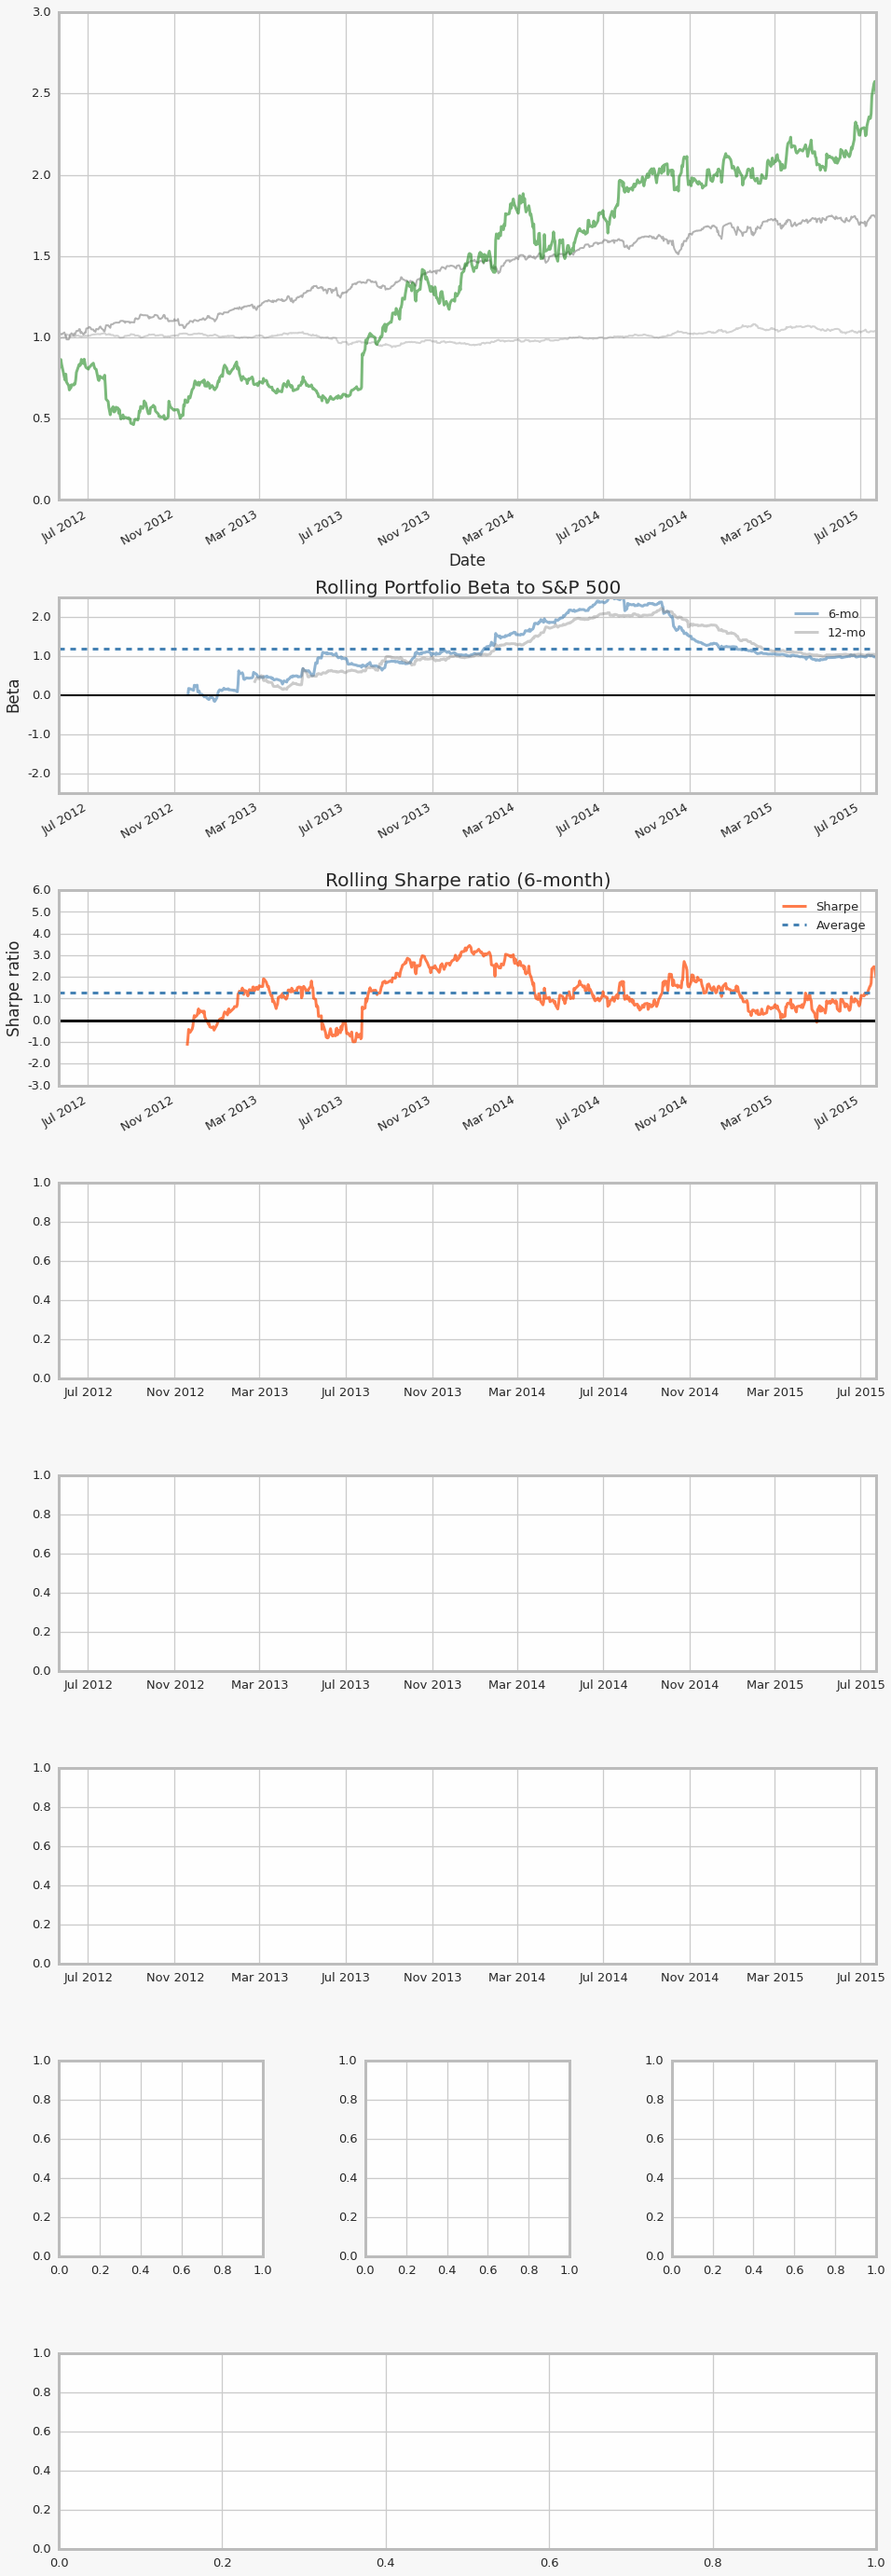

In [3]:
pf.create_full_tear_sheet(stock_rets)

## Create a full tear sheet for an equal-weight portfolio of:
* Long SPY
* Short QQQ
* Long GLD
* Long TLT

In [ ]:
stock_rets_SPY = pf.utils.get_symbol_rets('SPY')
stock_rets_QQQ = pf.utils.get_symbol_rets('QQQ')
stock_rets_GLD = pf.utils.get_symbol_rets('GLD')
stock_rets_TLT = pf.utils.get_symbol_rets('TLT')

In [ ]:
portfolio_4_assets_rets = pf.timeseries.portfolio_returns([stock_rets_SPY, -1 * stock_rets_QQQ, stock_rets_GLD, stock_rets_TLT], 
                                exclude_non_overlapping=True)

In [ ]:
pf.create_full_tear_sheet(portfolio_4_assets_rets, backtest_days_pct=0.8, bayesian=False)